853.9687479646828 3.22803906311448e-08 1.6140195315572398e-08


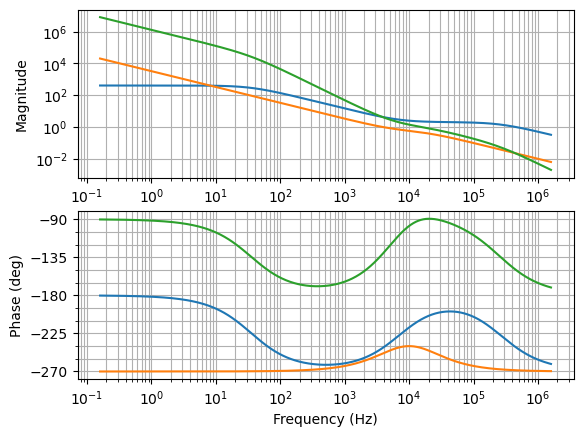

In [31]:
import control as co
import matplotlib.pyplot as plt
import numpy as np

Vin, Vd, D, T, L, R, Co, Rco = 12, 0.7, 5 / 12, 1 / 500e+3, 220e-6, 250, 22e-6, 1
Rs, Se, gm = 0.5, 0, 2000e-6
R1, Rb = 2.48e+3, 2.42e+3
R2, C1, C3 = 29.4e+3, 1000e-12, 47e-12
Vo = Vin * D
Gfc = -5
G = 10 ** (Gfc / 20)
fc = 10e+3
boost = 30
fp = (np.tan(boost * np.pi / 180) + np.sqrt((np.tan(boost * np.pi / 180) ** 2) + 1)) * fc
fz = (fc ** 2) / fp
a = np.sqrt(1 + (fc / fp) ** 2)
b = np.sqrt(1 + (fz / fc) ** 2)
R2 = fp * G * (R1 + Rb) / (fp - fz) / Rb / gm * a / b
C1 = 1 / (2 * np.pi * fz * R2)
C3 = Rb * gm / 2 / np.pi / fp / G / (Rb + R1) * b / a

A = Se * T + T * (Vin - Vo) * Rs / (2 * L)
B = T * Rs * D * (Vin - Vd) / (2 * L)
C = co.tf([A * L, Rs * (Vin - Vd)], [1])

G1 = (A * D - B) / (C * co.tf([Co, 0], [Rco * Co, 1]) + A - B + C / R)
G2 = -Rb * gm / (R1 + Rb) * co.tf([R2 * C1, 1], [R2 * C1 * C3, C1 + C3, 0])
G3 = -(Vin - Vd) / (A * D - B)

H = G1 * G2 * G3

print(R2, C1, C3)

mag, phase, omega = co.bode(G1 * G3, np.logspace(0, 7, 1000), Hz=True)
mag, phase, omega = co.bode(G2, np.logspace(0, 7, 1000), Hz=True)
mag, phase, omega = co.bode(H, np.logspace(0, 7, 1000), Hz=True)


799.396797077334 3.972443489307035e-08


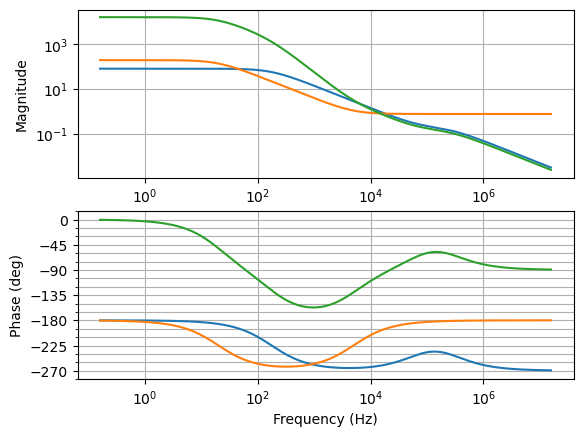

In [51]:
import control as co
import matplotlib.pyplot as plt
import numpy as np

Vin, Vd, D, T, L, R, Co, Rco = 12, 0.7, 5 / 12, 1 / 500e+3, 47e-6, 50, 22e-6, 0.1
Rs, Se, gm, R0 = 0.05 * 10, 0, 2000e-6, 200e+3
R1, Rb = 2.48e+3, 2.42e+3
Vo = Vin * D
fp = 10 ** 1.3
fz = 10 ** 3.7
C1 = 1 / (2 * np.pi * R0) * (fz - fp) / (fp * fz)
R2 = 1 / (2 * np.pi * C1 * fz)
# C1, R2 = 3.3e-9, 0

A = Se * T + T * (Vin - Vo) * Rs / (2 * L)
B = T * Rs * D * (Vin - Vd) / (2 * L)
C = co.tf([A * L, Rs * (Vin - Vd)], [1])

G1 = (A * D - B) / (C * co.tf([Co, 0], [Rco * Co, 1]) + A - B + C / R)
G2 = - Rb / (R1 + Rb) * gm * R0 * co.tf([R2 * C1, 1], [(R2 + R0) * C1, 1])
G3 = -(Vin - Vd) / (A * D - B)

H = G1 * G2 * G3

print(R2, C1)

mag, phase, omega = co.bode(G1 * G3, np.logspace(0, 8, 1000), Hz=True)
mag, phase, omega = co.bode(G2, np.logspace(0, 8, 1000), Hz=True)
mag, phase, omega = co.bode(H, np.logspace(0, 8, 1000), Hz=True)
